In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%%matplotlib inline

UsageError: Line magic function `%%matplotlib` not found.


In [3]:
df = pd.read_csv('Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.corr()

/var/folders/29/5h46lrgs74l2sh3vpzm338fh0000gn/T/ipykernel_18791/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


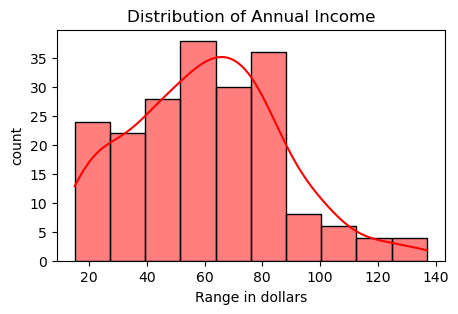

In [6]:
# Distribution of Annual Income

plt.figure(figsize= (5,3))
sns.histplot(df['Annual Income (k$)'], kde=True, color='red')
plt.title('Distribution of Annual Income')
plt.xlabel("Range in dollars")
plt.ylabel("count")
plt.show()

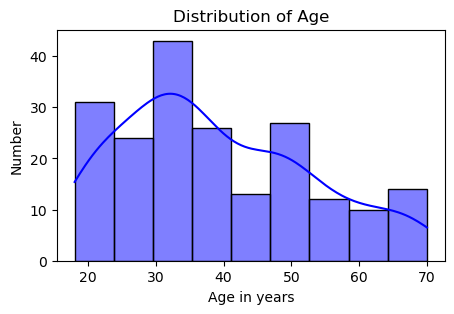

In [7]:
# Distribution of Age

plt.figure(figsize= (5,3))
sns.histplot(df['Age'], kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel("Age in years")
plt.ylabel("Number")
plt.show()

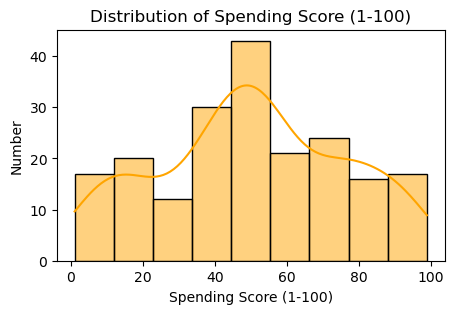

In [8]:
# Distribution of Spending Score 

plt.figure(figsize= (5,3))
sns.histplot(df['Spending Score (1-100)'], kde=True, color='orange')
plt.title('Distribution of Spending Score (1-100)')
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Number")
plt.show()

In [9]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [10]:
X = df[['Spending Score (1-100)','Annual Income (k$)']]

In [11]:
X.head()

,Spending Score (1-100),Annual Income (k$)
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17


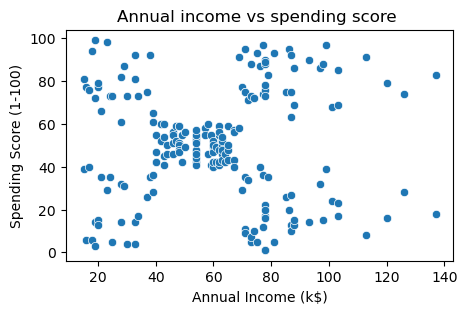

In [12]:
plt.figure(figsize=(5,3))
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df)
plt.title("Annual income vs spending score ")
plt.show()

In [13]:
from sklearn.cluster import KMeans

wc = []
for i in range(1, 11):
    model = KMeans(n_clusters=i)
    model.fit(X)
    wc.append(model.inertia_)



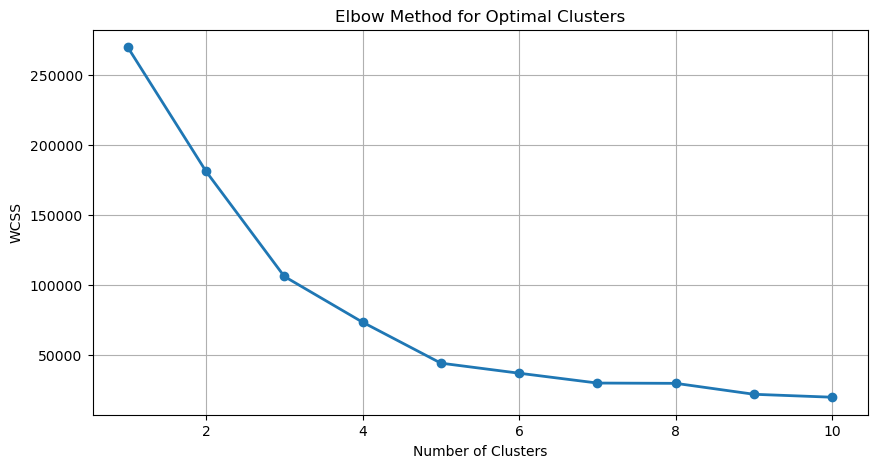

In [15]:
# Plot the Elbow Method graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wc, marker='o', linestyle='-', linewidth=2)  # Completed linewidth argument
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Clusters')
plt.grid(True)
plt.show()

In [16]:
model = KMeans(n_clusters=5)
model.fit(X)
y = model.predict(X)
df['label'] = y 
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2


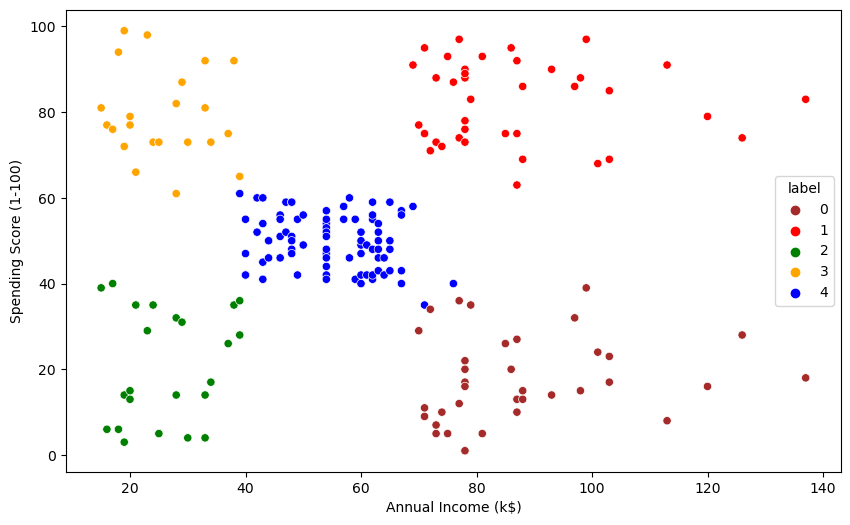

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)', y ='Spending Score (1-100)',
                hue= 'label', palette=['brown','red', 'green', 'orange','blue'], legend='full',
                data = df)
plt.show()